### Gen AI-Based Data Profiling

##
1. Extracted Profiling Rules
2. Anomaly Detection Results
3. Python Code To Validate Data
4. Risk Scores For Transaction
5. Suggested Remediation Action for Flagged Transaction

In [78]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [79]:
#Importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
import os
current_path = os.getcwd()
print(current_path)

C:\Users\visha


## 1. Reading the data set and generating general information

In [81]:
# Importing cleanes user data

userdata = pd.read_csv('Cleaned_Synthetic_Data_10K.csv')

In [82]:
# Looking at the first five rows
userdata.head()

,Customer_ID,Account_Balance,Transaction_Amount,Reported_Amount,Currency,Country,Transaction_Date,Risk_Score
0,1001,70329,15701,14438,EUR,US,07-03-2025,3
1,1002,23680,2736,2736,EUR,DE,24-02-2025,1
2,1003,11429,4698,4698,AUD,CA,24-02-2025,1
3,1004,40668,40507,40507,AUD,IN,11-03-2025,1
4,1005,-10000,1000,1000,AUD,AU,20-03-2025,4


In [83]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         10000 non-null  int64 
 1   Account_Balance     10000 non-null  int64 
 2   Transaction_Amount  10000 non-null  int64 
 3   Reported_Amount     10000 non-null  int64 
 4   Currency            10000 non-null  object
 5   Country             10000 non-null  object
 6   Transaction_Date    10000 non-null  object
 7   Risk_Score          10000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 625.1+ KB


In [84]:
userdata.shape

(10000, 8)

In [85]:
userdata.describe()

,Customer_ID,Account_Balance,Transaction_Amount,Reported_Amount,Risk_Score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6000.50000,29991.939000,19410.943800,19223.933400,1.980700
std,2886.89568,30988.019214,16180.375526,16031.442381,1.470355
min,1001.00000,-10000.000000,1.000000,0.000000,1.000000
25%,3500.75000,3629.500000,1410.250000,1410.250000,1.000000
50%,6000.50000,27527.000000,17396.500000,17285.000000,1.000000
75%,8500.25000,50773.000000,33683.000000,33360.500000,3.000000
max,11000.00000,164850.000000,49990.000000,49990.000000,10.000000


## 2. Cleaning the data

In [86]:
#Checking column wise null values
userdata.isnull().sum()

Customer_ID           0
Account_Balance       0
Transaction_Amount    0
Reported_Amount       0
Currency              0
Country               0
Transaction_Date      0
Risk_Score            0
dtype: int64

#### There is no null values in any of the columns

In [87]:
userdata.head(10)

,Customer_ID,Account_Balance,Transaction_Amount,Reported_Amount,Currency,Country,Transaction_Date,Risk_Score
0,1001,70329,15701,14438,EUR,US,07-03-2025,3
1,1002,23680,2736,2736,EUR,DE,24-02-2025,1
2,1003,11429,4698,4698,AUD,CA,24-02-2025,1
3,1004,40668,40507,40507,AUD,IN,11-03-2025,1
4,1005,-10000,1000,1000,AUD,AU,20-03-2025,4
5,1006,14335,30958,30958,AUD,DE,12-03-2025,1
6,1007,60998,5394,5394,GBP,CA,19-03-2025,1
7,1008,-10000,1000,1000,JPY,JP,14-03-2025,4
8,1009,-10000,1000,1000,INR,DE,10-03-2025,4
9,1010,27101,40533,40533,USD,UK,21-02-2025,1


##### The data set looks clean, all values are numerical and currency and country are in right coded format. Hence no need for any data transformation

## 3. Visualizing the data

#### Univariate and Bivariate Analysis

- To understand the behaviour of all the variables independently, plotting boxplot

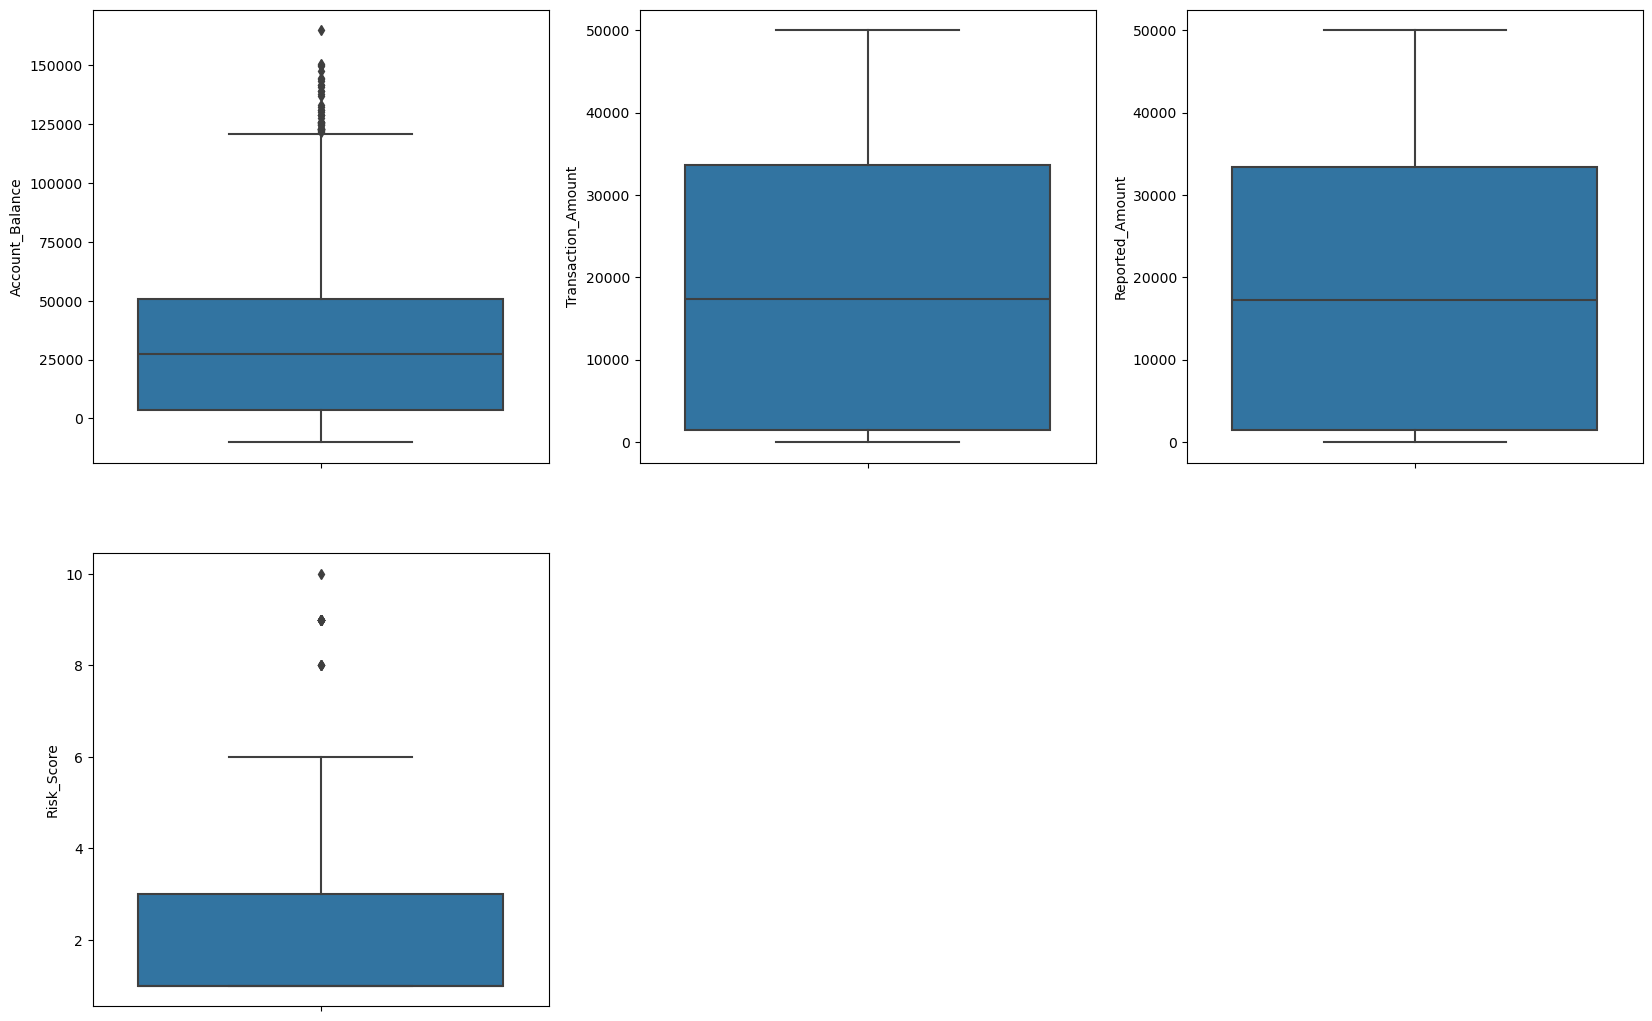

In [88]:
plt.figure(figsize=(20,20))
var = ['Account_Balance', 'Transaction_Amount', 'Reported_Amount', 'Risk_Score']
for i in enumerate(var): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(y=userdata[i[1]])
    plt.xticks(rotation = 20)

##### Above boxplots gives an adequate idea on the individual variables data distribution and outliers
##### Risk score seems to be a very important variable which is basically derived from other parameters

##### Risk Score vs Rest of the variables 

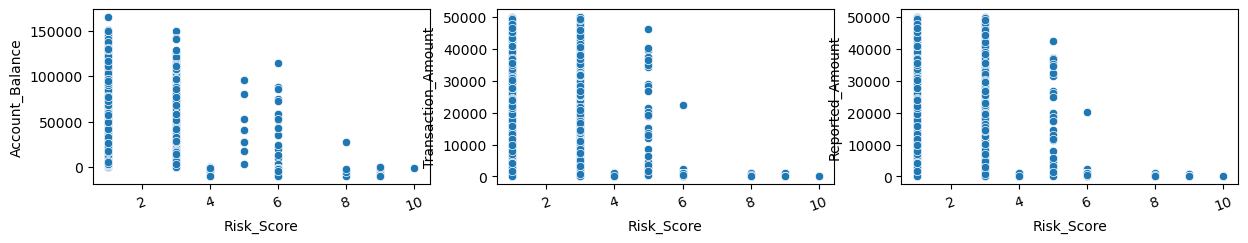

In [89]:
plt.figure(figsize=(20,5))
var = ['Account_Balance', 'Transaction_Amount', 'Reported_Amount']
for i in enumerate(var): 
    ax = plt.subplot(2, 4, i[0]+1)
    sns.scatterplot(x=userdata.Risk_Score, y=userdata[i[1]])
    plt.xticks(rotation = 20)

#### Let is check the overall profile of the dataset

In [90]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [91]:
from ydata_profiling import ProfileReport

In [92]:
ProfileReport(userdata)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 95.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Outlier treatment

#### We need to be careful here while treating the outliers. Keeping the business requirement in mind, if we apply any hard values to remove the outliers it might lead to loosing some important risk scores which might me vulnerable.
#### Better we capp the values, for choosing the quartile values we can look at the different percentile values and select Q4.

- From out univariate analysis we plotted boxplot and observed that there are outliers in account balance and risk score. Looking at the problem statement removing any of the outlier values might create vulnerability to analyse data. hence not removing these outliers.

In [93]:
userdata.describe(percentiles=[0.25,0.50,0.75,0.80,0.90,0.95,0.96,0.97,0.98,0.99])

,Customer_ID,Account_Balance,Transaction_Amount,Reported_Amount,Risk_Score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6000.50000,29991.939000,19410.943800,19223.933400,1.980700
std,2886.89568,30988.019214,16180.375526,16031.442381,1.470355
min,1001.00000,-10000.000000,1.000000,0.000000,1.000000
25%,3500.75000,3629.500000,1410.250000,1410.250000,1.000000
50%,6000.50000,27527.000000,17396.500000,17285.000000,1.000000
75%,8500.25000,50773.000000,33683.000000,33360.500000,3.000000
80%,9000.20000,56834.600000,36953.600000,36524.400000,4.000000
90%,10000.10000,72710.800000,43519.600000,42986.400000,4.000000
95%,10500.05000,86076.100000,46587.600000,46184.300000,4.000000


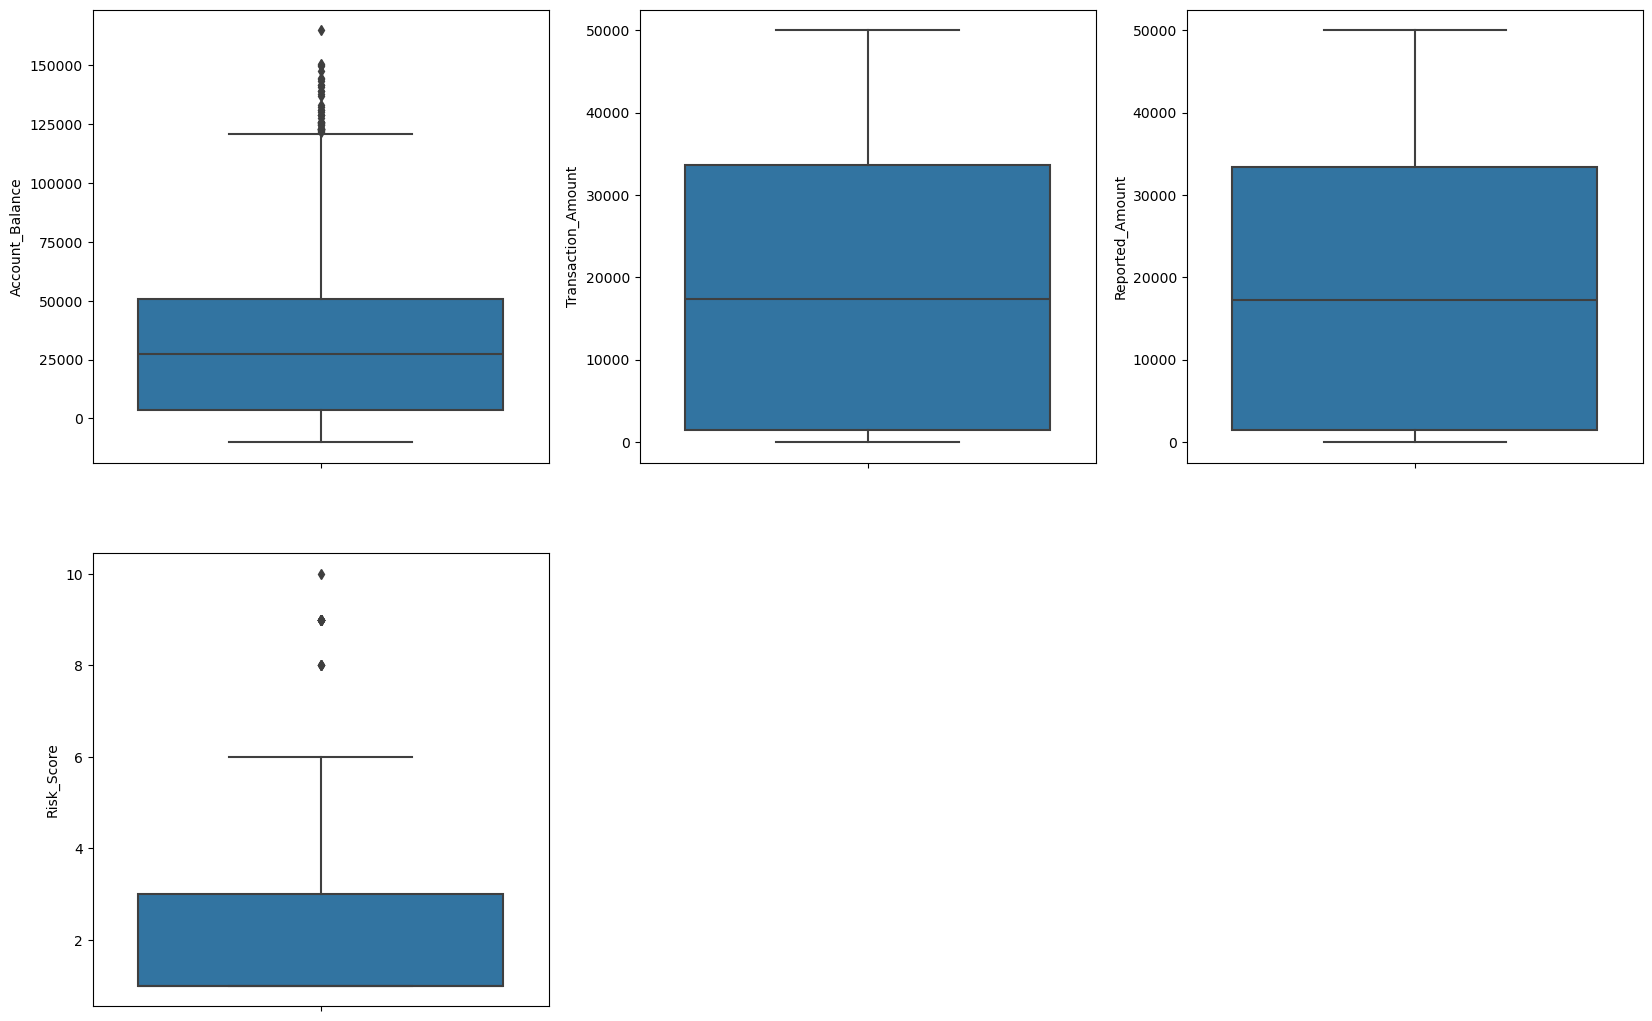

In [94]:
#Plotting boxplot again to check outliers
plt.figure(figsize=(20,20))
var = ['Account_Balance', 'Transaction_Amount', 'Reported_Amount', 'Risk_Score']
for i in enumerate(var): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(y=userdata[i[1]])
    plt.xticks(rotation = 20)

In [95]:
userdata.describe()

,Customer_ID,Account_Balance,Transaction_Amount,Reported_Amount,Risk_Score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6000.50000,29991.939000,19410.943800,19223.933400,1.980700
std,2886.89568,30988.019214,16180.375526,16031.442381,1.470355
min,1001.00000,-10000.000000,1.000000,0.000000,1.000000
25%,3500.75000,3629.500000,1410.250000,1410.250000,1.000000
50%,6000.50000,27527.000000,17396.500000,17285.000000,1.000000
75%,8500.25000,50773.000000,33683.000000,33360.500000,3.000000
max,11000.00000,164850.000000,49990.000000,49990.000000,10.000000


#### Need to drop currency and country to run hopkins

In [96]:
main_df = userdata.drop(['Currency','Country','Transaction_Date'], axis = 1)


main_df.info

<bound method DataFrame.info of       Customer_ID  Account_Balance  Transaction_Amount  Reported_Amount  \
0            1001            70329               15701            14438   
1            1002            23680                2736             2736   
2            1003            11429                4698             4698   
3            1004            40668               40507            40507   
4            1005           -10000                1000             1000   
...           ...              ...                 ...              ...   
9995        10996            18373               23971            23971   
9996        10997            57300                4099             4099   
9997        10998            68369                3115             2902   
9998        10999             5602               30231            30231   
9999        11000            26873               35579            35579   

      Risk_Score  
0              3  
1              1  
2         

## Hopkins stats before scalling

In [97]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [98]:
hopkins(main_df)

0.9293252699075978

In [100]:
main_df.info

<bound method DataFrame.info of       Customer_ID  Account_Balance  Transaction_Amount  Reported_Amount  \
0            1001            70329               15701            14438   
1            1002            23680                2736             2736   
2            1003            11429                4698             4698   
3            1004            40668               40507            40507   
4            1005           -10000                1000             1000   
...           ...              ...                 ...              ...   
9995        10996            18373               23971            23971   
9996        10997            57300                4099             4099   
9997        10998            68369                3115             2902   
9998        10999             5602               30231            30231   
9999        11000            26873               35579            35579   

      Risk_Score  
0              3  
1              1  
2         